<a href="https://colab.research.google.com/github/qmcnn/Data-Mining/blob/main/Project_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
visit = pd.read_csv('/content/drive/MyDrive/Project/ckdresearch2023/Visit.csv')
visit.shape

<ipython-input-21-8dbd214efeec>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  visit = pd.read_csv('/content/drive/MyDrive/Project/ckdresearch2023/Visit.csv')


(1340588, 11)

In [22]:
visit.head()

,PatientUID,PatientvisitUID,Sex,Age,ENTY,NATNL,StartDTTM,EndDttm,Location,PricipalProblemCode,PricipalProblemName
0,19319,25325,หญิง,83,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
1,83224,25327,ชาย,64,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
2,160455,25336,ชาย,86,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
3,181216,25338,หญิง,82,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
4,568147,25357,ชาย,68,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN


In [23]:
visit.isnull().sum()

PatientUID                  0
PatientvisitUID             0
Sex                         0
Age                         0
ENTY                        2
NATNL                    1715
StartDTTM                   0
EndDttm                   538
Location               162181
PricipalProblemCode    416963
PricipalProblemName    416963
dtype: int64

In [24]:
# กลุ่มและนับตาม 'PatientUID' โดยใช้ 'PatientvisitUID'
visit_df = visit.groupby('PatientUID').agg({
    'PatientvisitUID': 'count',
    'Sex': 'first',
    'Age': 'first',
    'ENTY': 'first',
    'NATNL': 'first',
    'Location': 'first',
    'PricipalProblemCode': 'first',
    'PricipalProblemName': 'first'
}).reset_index()
visit_df

,PatientUID,PatientvisitUID,Sex,Age,ENTY,NATNL,Location,PricipalProblemCode,PricipalProblemName
0,2299,83,หญิง,69,Out Patient,ไทย,หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร,1201005,Benign essential hypertension
1,2304,67,หญิง,52,Out Patient,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,370992007,Dyslipidemia
2,2312,83,หญิง,54,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,202855006,Lateral epicondylitis
3,2354,64,ชาย,60,Out Patient,ไทย,ตรวจสุขภาพ (คลินิก)-D1901,Z027,Issue of medical certificate
4,2362,88,ชาย,54,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,53059001,Replacement of mitral valve
...,...,...,...,...,...,...,...,...,...
22570,3421578,6,ชาย,66,Out Patient,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,I635,Cerebral infarction due to unspecified occlusi...
22571,3426284,4,หญิง,78,Out Patient,ลาว,เวชปฏิบัติทั่วไป (OPD)-D03,431857002,Chronic kidney disease stage 4
22572,3431501,4,หญิง,51,Out Patient,ไทย,ศัลยกรรม กว.-D06,K805,Calculus of bile duct without cholangitis or c...
22573,3432056,14,หญิง,73,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,285604008,Metastasis to lung of unknown primary


In [25]:
visit_df.isnull().sum()

PatientUID               0
PatientvisitUID          0
Sex                      0
Age                      0
ENTY                     0
NATNL                  111
Location                 0
PricipalProblemCode    256
PricipalProblemName    256
dtype: int64

In [26]:
#แทนค่า missing ในคอลัมน์NATNL,PricipalProblemCode,PricipalProblemName ด้วยค่า mode
#ถ้าไม่มีค่า mode ให้แทนค่านั้นด้วย None
modes = visit_df[['NATNL', 'PricipalProblemCode', 'PricipalProblemName']].mode().iloc[0]
visit_df['NATNL'] = visit_df['NATNL'].fillna(modes['NATNL'] if not pd.isna(modes['NATNL']) else None)
#visit_df['ENTY'] = visit_df['ENTY'].fillna(modes['ENTY'] if not pd.isna(modes['ENTY']) else None)
visit_df['PricipalProblemCode'] = visit_df['PricipalProblemCode'].fillna(modes['PricipalProblemCode'] if not pd.isna(modes['PricipalProblemCode']) else None)
visit_df['PricipalProblemName'] = visit_df['PricipalProblemName'].fillna(modes['PricipalProblemName'] if not pd.isna(modes['PricipalProblemName']) else None)
visit_df


,PatientUID,PatientvisitUID,Sex,Age,ENTY,NATNL,Location,PricipalProblemCode,PricipalProblemName
0,2299,83,หญิง,69,Out Patient,ไทย,หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร,1201005,Benign essential hypertension
1,2304,67,หญิง,52,Out Patient,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,370992007,Dyslipidemia
2,2312,83,หญิง,54,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,202855006,Lateral epicondylitis
3,2354,64,ชาย,60,Out Patient,ไทย,ตรวจสุขภาพ (คลินิก)-D1901,Z027,Issue of medical certificate
4,2362,88,ชาย,54,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,53059001,Replacement of mitral valve
...,...,...,...,...,...,...,...,...,...
22570,3421578,6,ชาย,66,Out Patient,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,I635,Cerebral infarction due to unspecified occlusi...
22571,3426284,4,หญิง,78,Out Patient,ลาว,เวชปฏิบัติทั่วไป (OPD)-D03,431857002,Chronic kidney disease stage 4
22572,3431501,4,หญิง,51,Out Patient,ไทย,ศัลยกรรม กว.-D06,K805,Calculus of bile duct without cholangitis or c...
22573,3432056,14,หญิง,73,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,285604008,Metastasis to lung of unknown primary


In [27]:
visit_df.shape

(22575, 9)

In [28]:
visit_df.isnull().sum()

PatientUID             0
PatientvisitUID        0
Sex                    0
Age                    0
ENTY                   0
NATNL                  0
Location               0
PricipalProblemCode    0
PricipalProblemName    0
dtype: int64

In [29]:
visit_df.describe()

,PatientUID,PatientvisitUID,Age
count,2.257500e+04,22575.000000,22575.000000
mean,1.233214e+06,59.383743,62.878184
std,9.348240e+05,59.180989,12.323428
min,2.299000e+03,2.000000,9.000000
25%,4.871035e+05,23.000000,56.000000
50%,1.061787e+06,46.000000,64.000000
75%,1.843714e+06,77.000000,71.000000
max,3.437526e+06,1169.000000,98.000000


In [30]:
visit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22575 entries, 0 to 22574
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PatientUID           22575 non-null  int64 
 1   PatientvisitUID      22575 non-null  int64 
 2   Sex                  22575 non-null  object
 3   Age                  22575 non-null  int64 
 4   ENTY                 22575 non-null  object
 5   NATNL                22575 non-null  object
 6   Location             22575 non-null  object
 7   PricipalProblemCode  22575 non-null  object
 8   PricipalProblemName  22575 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.6+ MB


In [31]:
visit_df.describe(include=np.object)

<ipython-input-31-48f1d76658c5>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visit_df.describe(include=np.object)


,Sex,ENTY,NATNL,Location,PricipalProblemCode,PricipalProblemName
count,22575,22575,22575,22575,22575,22575
unique,2,3,32,175,4227,4007
top,ชาย,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,1201005,Benign essential hypertension
freq,12042,20333,22304,3843,959,959


# ผลการสำรวจข้อมูลทางสถิติ และการสรุปด้วยตารางและรูปภาพ

### **ชื่อโรคที่มีคนเป็นมาที่สุด**


In [16]:
ProblemName = visit_df['PricipalProblemName'].value_counts().head(5)
ProblemName

Benign essential hypertension       959
Type 2 diabetes mellitus            672
General medical examination         562
End stage renal disease             454
Essential (primary) hypertension    417
Name: PricipalProblemName, dtype: int64

In [17]:
top_ProblemName = visit_df.groupby(['PricipalProblemName'])[['PatientUID']].count().sort_values(by='PatientUID',ascending=False).head(5)
top_ProblemName

,PatientUID
PricipalProblemName,
Benign essential hypertension,959
Type 2 diabetes mellitus,672
General medical examination,562
End stage renal disease,454
Essential (primary) hypertension,417


In [18]:
visit_df.groupby(['PricipalProblemName'])[['PatientUID']].count().sort_values(by='PatientUID',ascending=False)

,PatientUID
PricipalProblemName,
Benign essential hypertension,959
Type 2 diabetes mellitus,672
General medical examination,562
End stage renal disease,454
Essential (primary) hypertension,417
...,...
Gouty tophus of olecranon bursa,1
Graft complications,1
Graft rejection,1


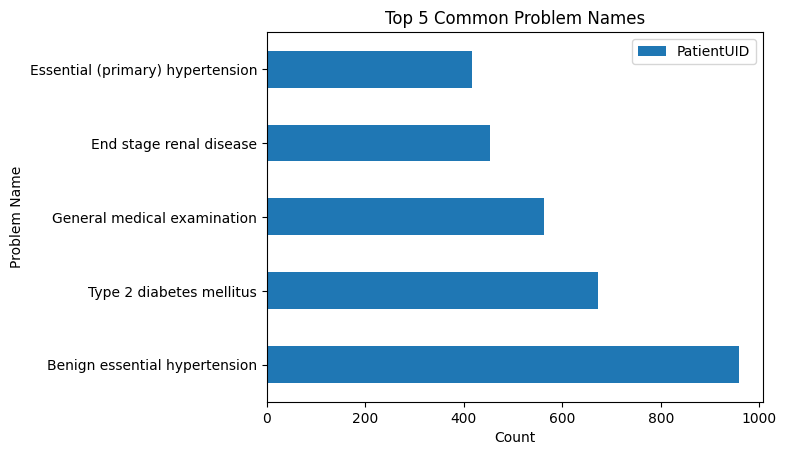

In [19]:
top_ProblemName.plot.barh()
plt.xlabel('Count')
plt.ylabel('Problem Name')
plt.title('Top 5 Common Problem Names')
plt.show()

### **สัญชาติที่มีการเข้ารักษามากทีสุด**

In [20]:
nationalities = visit_df.groupby(['NATNL'])[['PatientUID']].count().sort_values(by='PatientUID',ascending=False)
nationalities

,PatientUID
NATNL,
ไทย,22304
ลาว,114
อื่นๆ,24
"บริติช (อังกฤษ, สก็อตแลนด์)",23
อเมริกัน,19
ไม่ระบุ,16
เยอรมัน,10
ออสเตรเลีย,8
เวียดนาม,5


### **ประเภทของผู้ป่วยที่มาเข้ารับการรักษา**

In [21]:
ENTY = visit_df.groupby(['ENTY'])[['PatientUID']].count().sort_values(by='PatientUID',ascending=False)
ENTY

,PatientUID
ENTY,
Out Patient,20333
InPatient,1329
E,913


<Axes: xlabel='ENTY'>

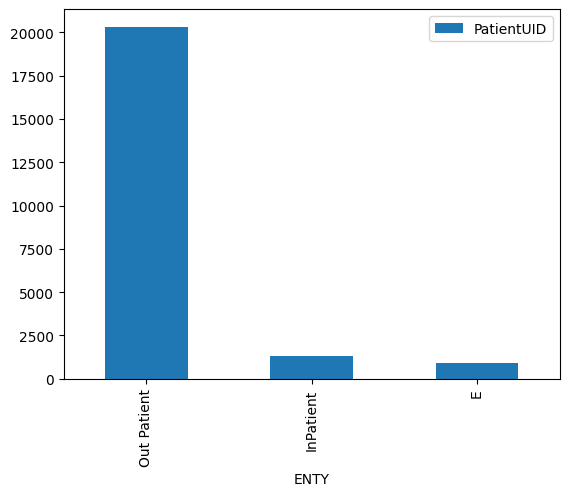

In [22]:
ENTY.plot.bar()

**เพศชายที่เป็นโรคBenign essential hypertension ในช่วงอายุ 0-12, 13-20, 21-59 และ60 ปีขึ้นไป**

In [23]:
# กรองข้อมูลโรค Benign essential hypertension
hypertension_df = visit_df[visit_df['PricipalProblemName'] == 'Benign essential hypertension']

# สร้างฟังก์ชันสำหรับกลุ่มอายุ
def age_group(age):
    if age <= 12:
        return '0-12'
    elif age <= 20:
        return '13-20'
    elif age <= 59:
        return '21-59'
    else:
        return '60+'

# เพิ่มคอลัมน์ Age Group โดยใช้ฟังก์ชัน age_group
hypertension_df['Age Group'] = hypertension_df['Age'].apply(age_group)

# กรองและนับจำนวนผู้ชายในแต่ละกลุ่มอายุ
female_hypertension_by_age = hypertension_df[hypertension_df['Sex'] == 'ชาย'].groupby('Age Group')['Sex'].count()

# แสดงผลลัพธ์
print(female_hypertension_by_age)


Age Group
21-59    124
60+      341
Name: Sex, dtype: int64


<ipython-input-23-cb1900e03676>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypertension_df['Age Group'] = hypertension_df['Age'].apply(age_group)


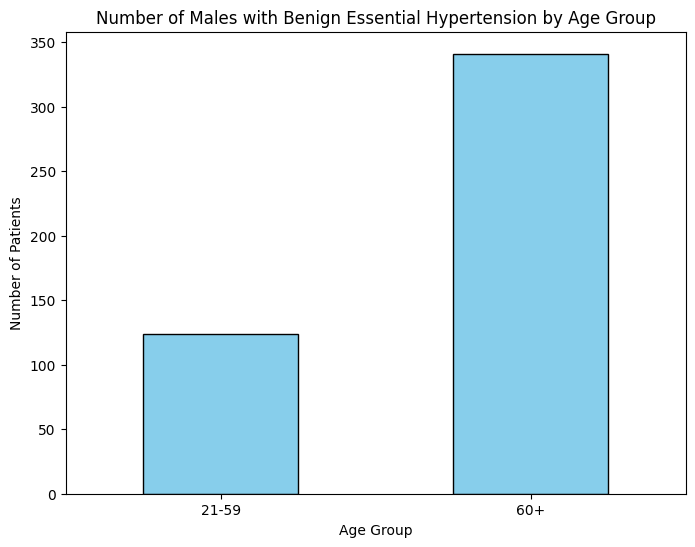

In [24]:
# สร้างแผนภูมิแท่งเปรียบเทียบจำนวนผูชายที่เป็นโรค Benign essential hypertension ในแต่ละกลุ่มอายุ
plt.figure(figsize=(8, 6))
female_hypertension_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Males with Benign Essential Hypertension by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # ไม่หมุนข้อความบนแกน x
plt.show()

### **ช่วงอายุใดในเพศชายที่มีการเข้ารับรักษามากสุด**

In [25]:
age = visit_df[visit_df['Sex'] == 'ชาย'].groupby('Age')['Sex'].count().sort_values(ascending=False)
age

Age
61    440
63    428
60    416
65    412
59    409
     ... 
14      3
98      2
13      2
93      1
9       1
Name: Sex, Length: 86, dtype: int64

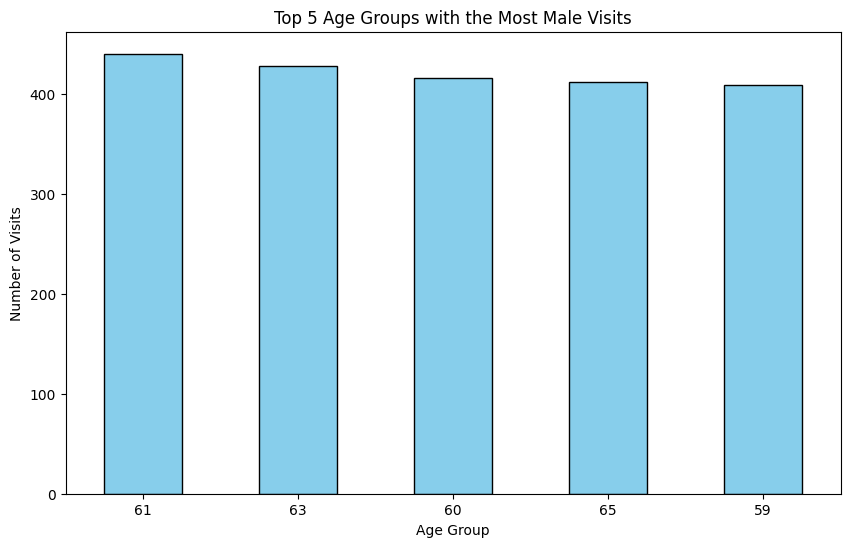

In [26]:
# เลือกเฉพาะ 5 กลุ่มอายุแรก
top_5_male_visits_by_age = age.head(5)

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 6))
top_5_male_visits_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Age Groups with the Most Male Visits')
plt.xlabel('Age Group')
plt.ylabel('Number of Visits')
plt.xticks(rotation=0)
plt.show()


### **อายุใดในสัญชาติไทยที่เข้ารับการรักษามากที่สุดและเป็นเพศใด**

In [28]:
 import matplotlib.pyplot as plt

# กรองข้อมูลเฉพาะสัญชาติไทย
thai_patients = visit_df[visit_df['NATNL'] == 'ไทย']

# หาจำนวนการเข้ารับการรักษาในแต่ละกลุ่มอายุ
age_group_visits = thai_patients.groupby('Age Group')['Age'].count().sort_values(ascending=False)

# เลือกเฉพาะ 5 กลุ่มอายุแรก
top_5_age_group_visits = age_group_visits.head(5)

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 6))
top_5_age_group_visits.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Age Groups with the Most Visits among Thai Nationals')
plt.xlabel('Age Group')
plt.ylabel('Number of Visits')
plt.xticks(rotation=0)
plt.show()


KeyError: ignored

In [29]:
# กรองข้อมูลเฉพาะสัญชาติไทย
thai_patients = visit_df[visit_df['NATNL'] == 'ไทย']

# หากลุ่มอายุที่มีจำนวนการเข้ารับการรักษามากที่สุด
most_visited_age = thai_patients.groupby('Age')['Sex'].value_counts()
most_visited_age_max = most_visited_age.idxmax()
most_visited_age_max

(61, 'ชาย')

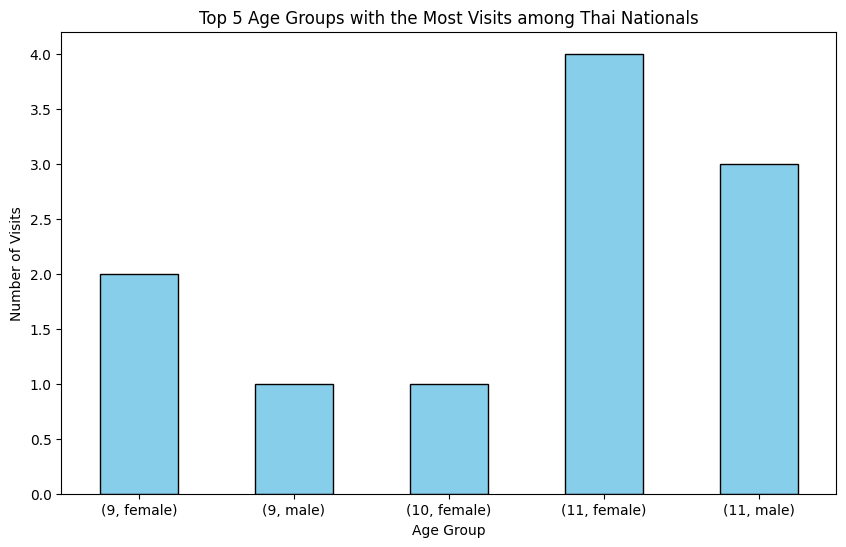

In [30]:
# เลือกเฉพาะ 5 กลุ่มอายุแรก
top_5_age_group_visits = most_visited_age.head(5)

# แทนค่าเพศเป็น male และ female
top_5_age_group_visits.index = top_5_age_group_visits.index.set_levels(['male', 'female'], level=1)

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 6))
top_5_age_group_visits.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Age Groups with the Most Visits among Thai Nationals')
plt.xlabel('Age Group')
plt.ylabel('Number of Visits')
plt.xticks(rotation=0)
plt.show()


### **แนวโน้มการเข้ารักษาแต่ละปี**

In [31]:
# ตรวจสอบแถวที่มีค่า NaN ในคอลัมน์ EndDttm
nan_rows = visit[visit['EndDttm'].isna()]

# ลบแถวที่มีค่า NaN ในคอลัมน์ EndDttm (หากต้องการลบ)
visit_na = visit.dropna(subset=['EndDttm'])


In [32]:
# ดึงปีออกมาจากคอลัมน์ StartDTTM และ EndDttm
visit['Start_Year'] = visit['StartDTTM'].str[:4].astype(int)
visit['End_Year'] = visit['EndDttm'].str[:4].astype(int)


ValueError: ignored

In [33]:
# ตรวจสอบแถวที่มีค่า 3106 ในคอลัมน์ 'EndDttm' และลบแถวที่มีค่านี้
visit = visit[visit['End_Year'] != 3106]

# นับจำนวนการเข้ารักษาในแต่ละปี
visits_per_start_year = visit['Start_Year'].value_counts().sort_index()
visits_per_end_year = visit['End_Year'].value_counts().sort_index()




# สร้างแผนภูมิเส้นเพื่อแสดงแนวโน้มการเข้ารักษาแต่ละปี
plt.figure(figsize=(10, 6))
plt.plot(visits_per_start_year, marker='o', label='Start Year')
plt.plot(visits_per_end_year, marker='x', label='End Year')
plt.title('Trend of Visits per Year (Start Year vs. End Year)')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)
plt.show()

KeyError: ignored

# Model

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [34]:
  #แปลงข้อมูลหมวดหมู่เป็นตัวเลข
label_encoder = LabelEncoder()
visit_df['Sex'] = label_encoder.fit_transform(visit_df['Sex'])
visit_df['ENTY'] = label_encoder.fit_transform(visit_df['ENTY'])


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# สร้าง Decision Tree Model
model = DecisionTreeClassifier()


In [36]:
# ใช้ข้อมูลเตรียมและค่าตัวแปรตาม
X = visit_df[['Sex', 'Age', 'ENTY']]
y = visit_df['PricipalProblemName']

# ฝึกโมเดล
model.fit(X, y)


DecisionTreeClassifier()

[Text(0.4231726178468159, 0.9705882352941176, 'x[1] <= 44.5\ngini = 0.994\nsamples = 22575\nvalue = [1, 1, 3 ... 4, 2, 1]'),
 Text(0.1800231995158362, 0.9117647058823529, 'x[1] <= 35.5\ngini = 0.967\nsamples = 1557\nvalue = [0, 0, 1 ... 0, 0, 0]'),
 Text(0.09415977405688924, 0.8529411764705882, 'x[2] <= 1.5\ngini = 0.942\nsamples = 642\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.05524174567951046, 0.7941176470588235, 'x[1] <= 34.5\ngini = 0.979\nsamples = 62\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.04270055813327954, 0.7352941176470589, 'x[1] <= 32.5\ngini = 0.977\nsamples = 57\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.024073700490888306, 0.6764705882352942, 'x[0] <= 0.5\ngini = 0.971\nsamples = 47\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.011835115325129446, 0.6176470588235294, 'x[1] <= 21.5\ngini = 0.949\nsamples = 23\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.004303678300047071, 0.5588235294117647, 'x[2] <= 0.5\ngini = 0.844\nsamples = 8\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.00215

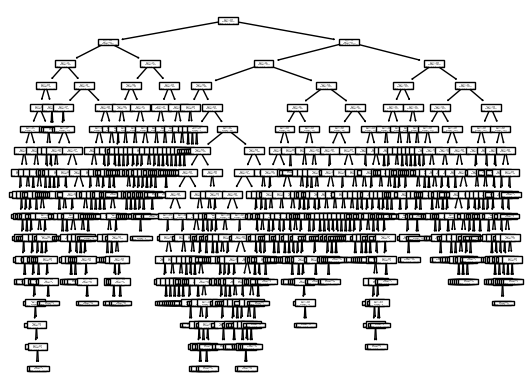

In [37]:
from sklearn.tree import plot_tree

plot_tree(model)

In [38]:
# แบ่งข้อมูลเป็นชุดฝึกอบรมและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# สร้างโมเดลจริงจากชุดฝึกอบรม
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [40]:
# ทำนายบนชุดทดสอบ
y_pred = model.predict(X_test)


In [41]:
# คำนวณความแม่นยำของโมเดล
accuracy = accuracy_score(y_test, y_pred)

# แสดงผลลัพธ์ความแม่นยำ
print(f'ความแม่นยำของโมเดลDecision Tree: {accuracy:}')

ความแม่นยำของโมเดลDecision Tree: 0.04806201550387597


# KNN

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ดาวน์โหลดข้อมูลหรือใช้ DataFrame ที่มีข้อมูลอยู่แล้ว
# visit_df = pd.read_csv('your_data.csv')

# เลือกเฉพาะคอลัมน์ที่เราสนใจ
X = visit_df[['Sex', 'Age', 'ENTY']]
y = visit_df['PricipalProblemName']




In [43]:
# แปลงข้อมูลที่เป็นข้อความในคอลัมน์ 'Sex' เป็นตัวเลข
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['ENTY'] = le.fit_transform(X['ENTY'])

<ipython-input-43-62e54df39be4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])
<ipython-input-43-62e54df39be4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ENTY'] = le.fit_transform(X['ENTY'])


In [44]:
# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# สร้างโมเดล k-Nearest Neighbors
n_neighbors = 5  # กำหนดจำนวนเพื่อบอกว่าใช้บ้านบ้านที่ใกล้ที่สุดกี่ตัว
knn = KNeighborsClassifier(n_neighbors=n_neighbors)


In [46]:
# ฝึกโมเดลด้วยชุดฝึก
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [47]:
# ทำนายผลลัพธ์บนชุดทดสอบ
y_pred = knn.predict(X_test)


In [48]:
# คำนวณความแม่นยำของโมเดล
accuracy = accuracy_score(y_test, y_pred)

# แสดงผลลัพธ์ความแม่นยำ
print(f'ความแม่นยำของโมเดลKNN: {accuracy:}')

ความแม่นยำของโมเดลKNN: 0.017054263565891473


# K-Mean

<ipython-input-49-b45ce33057c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_df['Sex'] = le.fit_transform(kmeans_df['Sex'])
<ipython-input-49-b45ce33057c9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_df['PricipalProblemName'] = le.fit_transform(kmeans_df['PricipalProblemName'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the 

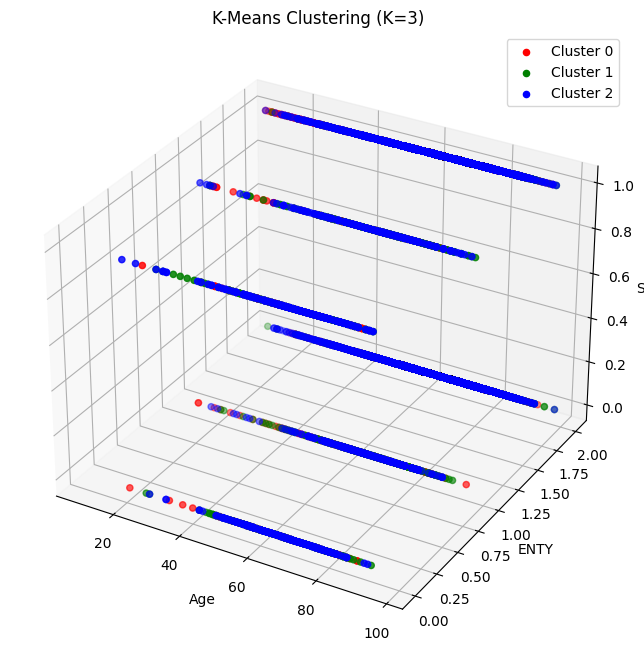

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# สร้าง DataFrame จากข้อมูล Sex, Age, ENTY, PricipalProblemName
kmeans_df = visit_df[['Sex', 'Age', 'ENTY', 'PricipalProblemName']]

# ใช้ LabelEncoder เพื่อแปลงข้อมูลของคอลัมน์ 'Sex' และ 'PricipalProblemName' เป็นตัวเลข
le = LabelEncoder()
kmeans_df['Sex'] = le.fit_transform(kmeans_df['Sex'])
kmeans_df['PricipalProblemName'] = le.fit_transform(kmeans_df['PricipalProblemName'])

# สร้างแบบจำลอง K-Means ด้วย K=3 (สมมติ)
kmeans = KMeans(n_clusters=3)
kmeans.fit(kmeans_df)

# เพิ่มคอลัมน์ 'Cluster' เข้ากับ DataFrame เพื่อบ่งบอกกลุ่ม
kmeans_df['Cluster'] = kmeans.labels_

# สร้างกราฟ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# กำหนดสีของกลุ่ม
colors = ['red', 'green', 'blue']

# วนลูปเพื่อพล็อตข้อมูลในแต่ละกลุ่ม
for cluster in range(3):
    cluster_data = kmeans_df[kmeans_df['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['ENTY'], cluster_data['Sex'], c=colors[cluster], label=f'Cluster {cluster}')

# ปรับแต่งกราฟ 3D
ax.set_xlabel('Age')
ax.set_ylabel('ENTY')
ax.set_zlabel('Sex')
ax.set_title('K-Means Clustering (K=3)')

# แสดงคำอธิบายสีของกลุ่ม
ax.legend()

# แสดงกราฟ 3D
plt.show()


In [50]:
import pandas as pd

# เลือกคอลัมน์ที่ต้องการใช้ใน Clustering
X = visit_df[['Sex', 'Age', 'ENTY']]
X

,Sex,Age,ENTY
0,1,69,2
1,1,52,2
2,1,54,2
3,0,60,2
4,0,54,2
...,...,...,...
22570,0,66,2
22571,1,78,2
22572,1,51,2
22573,1,73,2


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# ปรับสเกลข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-52-f7588b2653a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-52-f7588b2653a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-52-f7588b2653a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

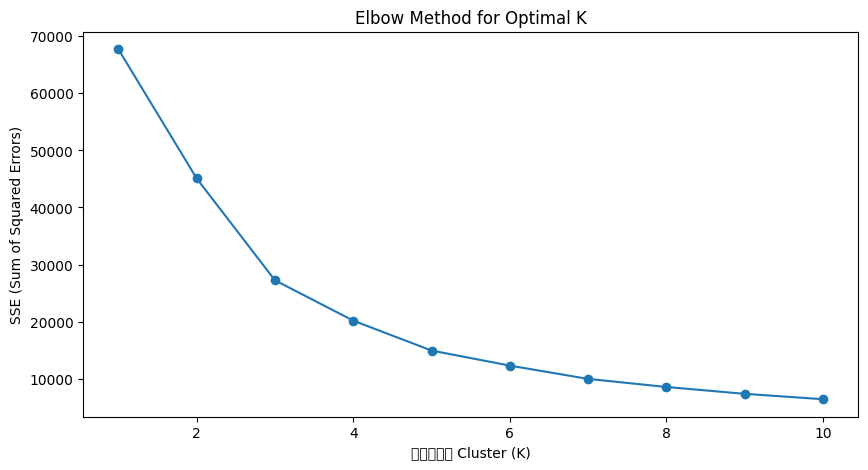

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X.fillna(X.mean(), inplace=True)
# ทำ K-means clustering สำหรับ K ตั้งแต่ 1 ถึง 10
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# พล็อตกราฟ Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('จำนวน Cluster (K)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal K')
plt.show()


# Naive Bayes

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# 1. โหลดข้อมูล
# สมมติว่าคุณมี DataFrame ชื่อ df ที่มีข้อมูล

# 2. การเตรียมข้อมูล
# ตัวอย่างการแปลงข้อมูลหมวดหมู่เช่นการใช้ Label Encoding สำหรับเพศ (Sex)
label_encoder = LabelEncoder()
visit_df['Sex'] = label_encoder.fit_transform(visit_df['Sex'])
visit_df['ENTY'] = label_encoder.fit_transform(visit_df['ENTY'])

# 3. แบ่งข้อมูล
X = visit_df[['Sex', 'Age', 'ENTY']]
y = visit_df['PricipalProblemName']  # สมมติว่าเป็นตัวแปรตาม

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)

# 4. สร้างและฝึกโมเดล Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 5. ทดสอบและประเมินโมเดล
y_pred = model.predict(X_test)

# คำนวณความแม่นยำของโมเดล
accuracy = accuracy_score(y_test, y_pred)

# แสดงผลลัพธ์ความแม่นยำ
print(f'ความแม่นยำของโมเดลNaive Bayes: {accuracy:}')



ความแม่นยำของโมเดลNaive Bayes: 0.0008053691275167785


# SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# 1. โหลดข้อมูลและเตรียมข้อมูล
# สมมติว่าคุณมี DataFrame ชื่อ visit_df ที่มีข้อมูล

# แปลงข้อมูลหมวดหมู่เป็นตัวเลข (เช่น 'Sex' และ 'ENTY')
label_encoder = LabelEncoder()
visit_df['Sex'] = label_encoder.fit_transform(visit_df['Sex'])
visit_df['ENTY'] = label_encoder.fit_transform(visit_df['ENTY'])

# เลือก feature และ target
X = visit_df[['Sex', 'Age', 'ENTY']]
y = visit_df['PricipalProblemName']

# 2. แบ่งข้อมูลเป็นชุดการฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. สร้างและฝึกโมเดล SVM
svm_model = SVC(kernel='linear')  # เลือก kernel ตามที่เหมาะสม (linear, rbf, หรืออื่น ๆ)
svm_model.fit(X_train, y_train)

# 4. ทดสอบและประเมินโมเดล
y_pred = svm_model.predict(X_test)

# คำนวณความแม่นยำของโมเดล
accuracy = accuracy_score(y_test, y_pred)
print(f'ความแม่นยำของโมเดลSVM: {accuracy}')


